In [1]:
# pip install tqdm


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from tqdm import tqdm


In [3]:
# 2. find url and store it in a variable
url = "https://www.popvortex.com/music/charts/top-100-songs.php"


In [4]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [5]:
# response.content

In [6]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [7]:
# 4.2. check that the html code looks like it should
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><title>iTunes Top 100 Songs Chart 2023</title><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="iTunes top 100 songs chart list. The most popular hit music and trending songs of 2023. Chart of today's current iTunes top 100 songs is updated daily." name="description"/><meta content="iTunes Top 100 Songs Chart 2023" property="og:title"><meta content="Chart of the top 100 songs on iTunes. Chart list of the top 100 song downloads of 2023 is updated daily." property="og:description"><meta content="article" property="og:type"><meta content="https://www.popvortex.com/images/logo-facebook.png" property="og:image"/><meta content="PopVortex" property="og:site_name"/><meta content="https://www.popvortex.com/music/charts/top-100-songs.php" property="og:url"/><meta content="100000239962942" property="fb:admins"/><meta content="178831188827052" property="fb:app_id"/><link href="/favicon.png" rel="shortcut

In [8]:
soup.select(".chart-wrapper")

[<div class="chart-wrapper"><div class="feed-item music-chart flex-row" id="chart-position-1"><div class="cover-art col-xs-12 col-sm-4"><p class="chart-position">1</p><img alt="Rich Men North of Richmond - Oliver Anthony Music Cover Art" class="cover-image" data-pin-description="Rich Men North of Richmond - Oliver Anthony Music" data-pin-media="https://is1-ssl.mzstatic.com/image/thumb/Music126/v4/32/fc/0e/32fc0e06-473b-0697-88e9-338876afb8d6/artwork.jpg/1200x1200bb.png" data-pin-url="https://www.popvortex.com/music/charts/top-100-songs.php" height="170" loading="lazy" src="https://is1-ssl.mzstatic.com/image/thumb/Music126/v4/32/fc/0e/32fc0e06-473b-0697-88e9-338876afb8d6/artwork.jpg/170x170bb.png" width="170"/> <audio controls="" controlslist="nodownload" preload="none"><source src="https://audio-ssl.itunes.apple.com/itunes-assets/AudioPreview116/v4/f6/79/2a/f6792aa3-e8b1-fee6-5a10-a4f7b9e729c8/mzaf_5933963711143189242.plus.aac.p.m4a"/></audio> </div><div class="chart-content col-xs-12 

In [9]:
# body > div.container > div:nth-child(4) > div.col-xs-12.col-md-8 > div.chart-wrapper

In [10]:
soup.select(".title-artist")

[<p class="title-artist"><cite class="title">Rich Men North of Richmond</cite><em class="artist">Oliver Anthony Music</em></p>,
 <p class="title-artist"><cite class="title">Paint The Town Red</cite><em class="artist">Doja Cat</em></p>,
 <p class="title-artist"><cite class="title">I Remember Everything (feat. Kacey Musgraves)</cite><em class="artist">Zach Bryan</em></p>,
 <p class="title-artist"><cite class="title">Lil Boo Thang</cite><em class="artist">Paul Russell</em></p>,
 <p class="title-artist"><cite class="title">Fast Car</cite><em class="artist">Luke Combs</em></p>,
 <p class="title-artist"><cite class="title">ONE MORE TIME</cite><em class="artist">blink-182</em></p>,
 <p class="title-artist"><cite class="title">White Horse</cite><em class="artist">Chris Stapleton</em></p>,
 <p class="title-artist"><cite class="title">September</cite><em class="artist">Earth, Wind &amp; Fire</em></p>,
 <p class="title-artist"><cite class="title">Lose Control</cite><em class="artist">Teddy Swims<

In [11]:
title = []
artist = []

num_iter = len(soup.select(".title-artist"))
tClist = soup.select(".title-artist")

# iterate through the result set and retrive all the data
for i in range(num_iter):
    title.append(tClist[i].find(class_="title").get_text())
    artist.append(tClist[i].find(class_="artist").get_text())

print(artist)
print(title)

['Oliver Anthony Music', 'Doja Cat', 'Zach Bryan', 'Paul Russell', 'Luke Combs', 'blink-182', 'Chris Stapleton', 'Earth, Wind & Fire', 'Teddy Swims', 'Earth, Wind & Fire', 'Jelly Roll', 'Jelly Roll', 'Taylor Swift', 'Dua Lipa', 'Bailey Zimmerman', 'Morgan Wallen', 'Miley Cyrus', 'blink-182', 'Morgan Wallen', 'Jason Aldean', 'Lainey Wilson', 'Shakira & Fuerza Regida', 'Olivia Rodrigo', 'Rema & Selena Gomez', 'Cardi B & Megan Thee Stallion', 'Troye Sivan', 'Zach Bryan', 'Miley Cyrus', 'Tyler Childers', 'David Kushner', 'Billie Eilish', 'SZA', 'Noah Kahan & Post Malone', 'Luke Combs', 'Lauv', 'Fall Out Boy', 'Jelly Roll', 'Jimmy Buffett', 'Maren Morris', 'MILCK & Natasha Bedingfield', 'Chris Stapleton', 'Olivia Rodrigo', 'Chris Stapleton', 'Diddy, The Weeknd & French Montana', 'HARDY', 'Morgan Wallen', 'Elevation Worship', 'Gunna', 'Warren Zeiders', 'HARDY', 'Tyla', 'NEEDTOBREATHE', 'USHER, Summer Walker & 21 Savage', 'Miley Cyrus', 'Duran Duran', 'Taylor Swift', 'Kane Brown & Katelyn Bro

In [12]:
df=pd.DataFrame({"artist":artist,"title":title})
df

,artist,title
0,Oliver Anthony Music,Rich Men North of Richmond
1,Doja Cat,Paint The Town Red
2,Zach Bryan,I Remember Everything (feat. Kacey Musgraves)
3,Paul Russell,Lil Boo Thang
4,Luke Combs,Fast Car
...,...,...
95,KAROL G & Peso Pluma,QLONA
96,Jimmy Buffett,Margaritaville
97,CeCe Winans,Goodness of God (Live)
98,Taylor Swift,Karma


In [13]:
# songs.to_csv("songs.to_csv",index='False')

In [14]:


# # Input song from the user
# input_song = input("Enter a song: ")

# # Filter the DataFrame to find songs by the same artist
# similar_songs = df[df['artist'] == input_song]

# # Check if any similar songs were found
# if similar_songs.empty:
#     print("No similar songs found.")
# else:
#     # Select a random song from the similar songs
#     recommended_song = similar_songs.sample(n=1)

#     # Print the recommended song
#     print("Recommended Song:")
#     print(recommended_song[['artist', 'title']])


# search engine

In [15]:
import random


In [16]:
# def search_random_title(input_title):
#     if input_title in df['title'].values:
#         while True:
#             random_title = random.choice(df['title'])
#             if random_title != input_title:
#                 return random_title
#     else:
#         return "Sorry, we don't have this title."

# input_title = input("Enter a song title: ")
# search_random_title(input_title)

In [17]:
# Adding more songs

In [18]:
secrets_file = open("secret.txt","r")


In [19]:
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [20]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['Client ID'],
                                                           client_secret=secrets_dict['Client secret']))

In [21]:
# Playlists
# We will need to collect a "database" of songs. Playlists are a good way to access relatively large amounts of songs.

In [22]:
playlist = sp.user_playlist_tracks("spotify", "5S8SJdl1BDc0ugpkEvFsIL")


In [23]:
playlist["total"] 


10000

In [24]:
len(playlist["items"])


100

In [25]:
playlist['next']


'https://api.spotify.com/v1/playlists/5S8SJdl1BDc0ugpkEvFsIL/tracks?offset=100&limit=100&additional_types=track'

In [26]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

In [27]:
# with this spotify playlist getting error in chunks why? resolve it later!
# all_tracks = get_playlist_tracks("5S8SJdl1BDc0ugpkEvFsIL")
# len(all_tracks)

In [28]:
all_tracks = get_playlist_tracks("54nv8jbrm4JoHEZ49Qvjgl")
len(all_tracks)

9925

In [29]:
from pandas import json_normalize


In [30]:
spotify = json_normalize(all_tracks)
#spotify

In [31]:
spotify.columns


Index(['added_at', 'is_local', 'primary_color',
       'added_by.external_urls.spotify', 'added_by.href', 'added_by.id',
       'added_by.type', 'added_by.uri', 'track.album.album_type',
       'track.album.artists', 'track.album.available_markets',
       'track.album.external_urls.spotify', 'track.album.href',
       'track.album.id', 'track.album.images', 'track.album.name',
       'track.album.release_date', 'track.album.release_date_precision',
       'track.album.total_tracks', 'track.album.type', 'track.album.uri',
       'track.artists', 'track.available_markets', 'track.disc_number',
       'track.duration_ms', 'track.episode', 'track.explicit',
       'track.external_ids.isrc', 'track.external_urls.spotify', 'track.href',
       'track.id', 'track.is_local', 'track.name', 'track.popularity',
       'track.preview_url', 'track.track', 'track.track_number', 'track.type',
       'track.uri', 'video_thumbnail.url', 'track'],
      dtype='object')

In [32]:
spotify["track.artists"]


0       [{'external_urls': {'spotify': 'https://open.s...
1       [{'external_urls': {'spotify': 'https://open.s...
2       [{'external_urls': {'spotify': 'https://open.s...
3       [{'external_urls': {'spotify': 'https://open.s...
4       [{'external_urls': {'spotify': 'https://open.s...
                              ...                        
9920    [{'external_urls': {'spotify': 'https://open.s...
9921    [{'external_urls': {'spotify': 'https://open.s...
9922    [{'external_urls': {'spotify': 'https://open.s...
9923    [{'external_urls': {'spotify': 'https://open.s...
9924    [{'external_urls': {'spotify': 'https://open.s...
Name: track.artists, Length: 9925, dtype: object

In [33]:
def list_to_dict(x):
    if isinstance(x, list):
        return {i: x[i] for i in range(len(x))}
    else:
        return {} 

In [34]:
spotify['artist_dict'] = spotify['track.artists'].apply(lambda x: list_to_dict(x))
#spotify

In [35]:
def expand_list_dict2(row):
    df = pd.DataFrame.from_dict(row['artist_dict'], orient='index')
    df['song_id'] = row['track.id']
    return df

In [36]:
spotify['artists_dfs'] = spotify.apply(expand_list_dict2, axis=1)
spotify['artists_dfs'][3]

,external_urls,href,id,name,type,uri,song_id
0,{'spotify': 'https://open.spotify.com/artist/3...,https://api.spotify.com/v1/artists/3AQRLZ9PuTA...,3AQRLZ9PuTAozP28Skbq8V,The Script,artist,spotify:artist:3AQRLZ9PuTAozP28Skbq8V,4Musyaro0NM5Awx8b5c627


In [37]:
artist_df2 = pd.DataFrame(columns=['external_urls', 'href', 'id', 'name', 'type', 'uri'])
for val in spotify['artists_dfs']:
    #display(val)
    artist_df2 = pd.concat([artist_df2, val], axis=0)
    
#artist_df2

In [38]:
df_merged2 = pd.merge(left=spotify,
                    right=artist_df2,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
#df_merged2

In [39]:
spotify_songs = df_merged2[['track.name', 'name', 'song_id']]
spotify_songs

,track.name,name,song_id
0,Firework,Katy Perry,4lCv7b86sLynZbXhfScfm2
1,All We Are,OneRepublic,1Jx69b09LKTuBQxkEiFfVX
2,Wake Up Alone,Amy Winehouse,4u83mwF5tUuWlXS86UOXdu
3,The Man Who Can't Be Moved,The Script,4Musyaro0NM5Awx8b5c627
4,Rolling in the Deep,Adele,1CkvWZme3pRgbzaxZnTl5X
...,...,...,...
12231,I AM WOMAN,Emmy Meli,3nOz1U41SZZ0N3fuUWr9nb
12232,The Girl,City and Colour,1IFRVS4t1olI0XG9RBWdKH
12233,The Funeral,Band of Horses,5lRzWDEe7UuedU2QPsFg0K
12234,Hallucinogenics,Matt Maeson,6bLU8e0LGyztE9iD5DWBQ1


# Audio features

In [40]:
# # get the audio features for a song
# sp.audio_features('5S8SJdl1BDc0ugpkEvFsIL')

In [42]:
chunks = [(i, i+100) for i in range(0, len(spotify_songs), 100)]
audio_features_list = []
for chunk in chunks:
    id_list100 = spotify_songs['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)


12236

In [43]:
audio_features_df = json_normalize(audio_features_list)

In [44]:
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,0.608,0.629,10,-5.024,1,0.0264,0.4230,0.000000,0.0978,0.325,99.953,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,0.646,0.471,10,-9.247,1,0.1570,0.1220,0.000000,0.1250,0.455,170.084,audio_features,3nOz1U41SZZ0N3fuUWr9nb,spotify:track:3nOz1U41SZZ0N3fuUWr9nb,https://api.spotify.com/v1/tracks/3nOz1U41SZZ0...,https://api.spotify.com/v1/audio-analysis/3nOz...,232813,4
12232,0.404,0.542,10,-7.578,1,0.0349,0.8370,0.000072,0.1370,0.183,109.166,audio_features,1IFRVS4t1olI0XG9RBWdKH,spotify:track:1IFRVS4t1olI0XG9RBWdKH,https://api.spotify.com/v1/tracks/1IFRVS4t1olI...,https://api.spotify.com/v1/audio-analysis/1IFR...,360107,4
12233,0.319,0.757,0,-6.117,0,0.0432,0.0160,0.000000,0.1020,0.101,122.465,audio_features,5lRzWDEe7UuedU2QPsFg0K,spotify:track:5lRzWDEe7UuedU2QPsFg0K,https://api.spotify.com/v1/tracks/5lRzWDEe7Uue...,https://api.spotify.com/v1/audio-analysis/5lRz...,322173,4
12234,0.549,0.653,0,-7.470,1,0.0503,0.4570,0.000000,0.0969,0.287,121.348,audio_features,6bLU8e0LGyztE9iD5DWBQ1,spotify:track:6bLU8e0LGyztE9iD5DWBQ1,https://api.spotify.com/v1/tracks/6bLU8e0LGyzt...,https://api.spotify.com/v1/audio-analysis/6bLU...,187173,4


In [45]:
df_w_audio_ft = pd.merge(left=spotify_songs,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')

In [46]:
df_w_audio_ft

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Firework,Katy Perry,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.1390,...,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,All We Are,OneRepublic,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2,-5.495,1,0.0420,0.0966,...,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,Wake Up Alone,Amy Winehouse,4u83mwF5tUuWlXS86UOXdu,0.384,0.527,11,-5.294,0,0.0269,0.5420,...,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,The Man Who Can't Be Moved,The Script,4Musyaro0NM5Awx8b5c627,0.608,0.629,10,-5.024,1,0.0264,0.4230,...,0.0978,0.325,99.953,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,Rolling in the Deep,Adele,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.1310,...,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21153,I AM WOMAN,Emmy Meli,3nOz1U41SZZ0N3fuUWr9nb,0.646,0.471,10,-9.247,1,0.1570,0.1220,...,0.1250,0.455,170.084,audio_features,3nOz1U41SZZ0N3fuUWr9nb,spotify:track:3nOz1U41SZZ0N3fuUWr9nb,https://api.spotify.com/v1/tracks/3nOz1U41SZZ0...,https://api.spotify.com/v1/audio-analysis/3nOz...,232813,4
21154,The Girl,City and Colour,1IFRVS4t1olI0XG9RBWdKH,0.404,0.542,10,-7.578,1,0.0349,0.8370,...,0.1370,0.183,109.166,audio_features,1IFRVS4t1olI0XG9RBWdKH,spotify:track:1IFRVS4t1olI0XG9RBWdKH,https://api.spotify.com/v1/tracks/1IFRVS4t1olI...,https://api.spotify.com/v1/audio-analysis/1IFR...,360107,4
21155,The Funeral,Band of Horses,5lRzWDEe7UuedU2QPsFg0K,0.319,0.757,0,-6.117,0,0.0432,0.0160,...,0.1020,0.101,122.465,audio_features,5lRzWDEe7UuedU2QPsFg0K,spotify:track:5lRzWDEe7UuedU2QPsFg0K,https://api.spotify.com/v1/tracks/5lRzWDEe7Uue...,https://api.spotify.com/v1/audio-analysis/5lRz...,322173,4
21156,Hallucinogenics,Matt Maeson,6bLU8e0LGyztE9iD5DWBQ1,0.549,0.653,0,-7.470,1,0.0503,0.4570,...,0.0969,0.287,121.348,audio_features,6bLU8e0LGyztE9iD5DWBQ1,spotify:track:6bLU8e0LGyztE9iD5DWBQ1,https://api.spotify.com/v1/tracks/6bLU8e0LGyzt...,https://api.spotify.com/v1/audio-analysis/6bLU...,187173,4


In [47]:
df_w_audio_ft.isna().sum()


track.name          0
name                0
song_id             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [48]:
df_w_audio_ft=df_w_audio_ft.drop_duplicates()
len(df_w_audio_ft)

12158

# You want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

In [49]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


In [50]:
df_n = df_w_audio_ft.select_dtypes(include=np.number)
df_n

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,227880,4
1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,266227,4
2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,221200,3
3,0.608,0.629,10,-5.024,1,0.0264,0.4230,0.000000,0.0978,0.325,99.953,241467,4
4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,228293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21153,0.646,0.471,10,-9.247,1,0.1570,0.1220,0.000000,0.1250,0.455,170.084,232813,4
21154,0.404,0.542,10,-7.578,1,0.0349,0.8370,0.000072,0.1370,0.183,109.166,360107,4
21155,0.319,0.757,0,-6.117,0,0.0432,0.0160,0.000000,0.1020,0.101,122.465,322173,4
21156,0.549,0.653,0,-7.470,1,0.0503,0.4570,0.000000,0.0969,0.287,121.348,187173,4


In [51]:
df_c = df_w_audio_ft.select_dtypes(include=object)
df_c


,track.name,name,song_id,type,id,uri,track_href,analysis_url
0,Firework,Katy Perry,4lCv7b86sLynZbXhfScfm2,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...
1,All We Are,OneRepublic,1Jx69b09LKTuBQxkEiFfVX,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...
2,Wake Up Alone,Amy Winehouse,4u83mwF5tUuWlXS86UOXdu,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...
3,The Man Who Can't Be Moved,The Script,4Musyaro0NM5Awx8b5c627,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...
4,Rolling in the Deep,Adele,1CkvWZme3pRgbzaxZnTl5X,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...
...,...,...,...,...,...,...,...,...
21153,I AM WOMAN,Emmy Meli,3nOz1U41SZZ0N3fuUWr9nb,audio_features,3nOz1U41SZZ0N3fuUWr9nb,spotify:track:3nOz1U41SZZ0N3fuUWr9nb,https://api.spotify.com/v1/tracks/3nOz1U41SZZ0...,https://api.spotify.com/v1/audio-analysis/3nOz...
21154,The Girl,City and Colour,1IFRVS4t1olI0XG9RBWdKH,audio_features,1IFRVS4t1olI0XG9RBWdKH,spotify:track:1IFRVS4t1olI0XG9RBWdKH,https://api.spotify.com/v1/tracks/1IFRVS4t1olI...,https://api.spotify.com/v1/audio-analysis/1IFR...
21155,The Funeral,Band of Horses,5lRzWDEe7UuedU2QPsFg0K,audio_features,5lRzWDEe7UuedU2QPsFg0K,spotify:track:5lRzWDEe7UuedU2QPsFg0K,https://api.spotify.com/v1/tracks/5lRzWDEe7Uue...,https://api.spotify.com/v1/audio-analysis/5lRz...
21156,Hallucinogenics,Matt Maeson,6bLU8e0LGyztE9iD5DWBQ1,audio_features,6bLU8e0LGyztE9iD5DWBQ1,spotify:track:6bLU8e0LGyztE9iD5DWBQ1,https://api.spotify.com/v1/tracks/6bLU8e0LGyzt...,https://api.spotify.com/v1/audio-analysis/6bLU...


In [52]:
X = pd.DataFrame(df_n)
# _ = pd.Series(df_c)
# Comment the different variables of this dataset
# Notice how they are all numerical - KMeans cannot deal with categorical variables
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,227880,4
1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,266227,4
2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,221200,3
3,0.608,0.629,10,-5.024,1,0.0264,0.4230,0.000000,0.0978,0.325,99.953,241467,4
4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,228293,4


In [53]:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# # Now, all features will have the same weight.
X_prep=pd.DataFrame(X_prep,columns=X.columns)
X_prep.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.321318,0.792327,0.787791,0.598149,0.731109,-0.377219,-0.316151,-0.261176,-0.704899,0.679707,0.119614,0.053962,0.169160
1,-1.339608,0.748009,-0.878231,0.431589,0.731109,-0.454842,-0.471237,-0.261115,0.826871,-0.320411,1.320494,0.843955,0.169160
2,-1.429202,-0.680019,1.620802,0.495116,-1.367786,-0.653503,1.157905,-0.261176,-0.212939,-1.153127,-0.706478,-0.083654,-3.185901
3,0.114564,-0.177747,1.343132,0.580450,0.731109,-0.660081,0.722638,-0.261176,-0.591169,-0.711015,-0.733977,0.333870,0.169160
4,0.948473,0.447631,0.787791,0.550425,0.731109,-0.620612,-0.345412,-0.261176,-0.884266,0.134578,-0.557306,0.062470,0.169160


# Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

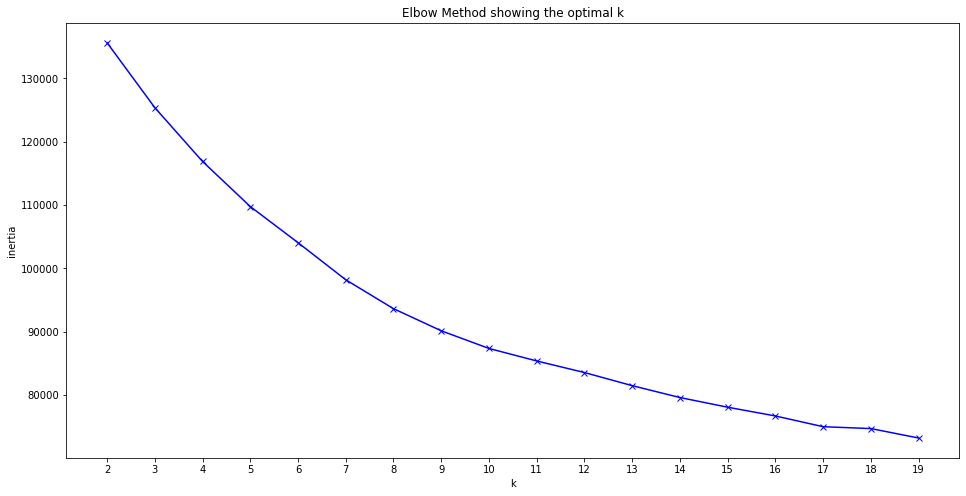

In [54]:
from sklearn.cluster import KMeans

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [55]:

from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

AttributeError: 'NoneType' object has no attribute 'split'

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=17, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=17, random_state=42)

In [57]:
X_prep.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [60]:
X_prep.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [58]:
# pip install threadpoolctl


In [59]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# clusters
df_with_audiof['clusters'] = clusters


In [ ]:
df_with_audiof.head()


In [ ]:
df_with_audiof.to_csv('df_with_audiof.csv')


In [ ]:
search_results = sp.search(q='Mamma Mia', limit=1)
search_results


In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 3], c=clusters,alpha=0.5)
plt.show()

In [ ]:
kmeans.inertia_ 

In [ ]:
clu_df=pd.DataFrame(df_c[["track.name","name"]])
clu_df["cluster"]=clusters
clu_df

In [ ]:
def get_cluster_from_imput(x):
    search_results = sp.search(q=x, limit=1)
    song_id = search_results['tracks']['items'][0]['id']
    audio_features = sp.audio_features(song_id)
    audio_features_df = json_normalize(audio_features)
    X = audio_features_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
    # print('X', X)
    X_scaled = scaler.transform(X)
    # print('X_scaled', X_scaled)
    cluster = kmeans.predict(X_scaled)
    return cluster[0]

In [ ]:

import random

def pick_one_random_song(x):
    filtered_df = df_with_audiof[df_with_audiof['clusters'] == x]
    random_row = filtered_df.sample(n=1, random_state=random.seed())
    return random_row

In [ ]:
get_cluster_from_imput('When I Was Your Man')


In [ ]:

df_w_audio_ft["cluster"]=clusters
df_w_audio_ft

In [ ]:
!pip install wikipedia-api


In [ ]:
max_characters = 100
pd.set_option("display.max_colwidth", max_characters)

user_input = input("Tell me a song you like: ")
user_input = user_input.lower()


from IPython.display import Image, display

if user_input in songs['title'].values:
    suggested_titles = songs[songs['title'] != user_input]['title']
    if not suggested_titles.empty:
        print("You like hit songs. You might also like: " + suggested_titles.sample().values[0])
else:
    search_results = sp.search(q=user_input, limit=10)
    song_info = search_results['tracks']['items'][0]['artists'][0]['name']
    print("I am going to search similar songs to " + user_input + " from " + search_results['tracks']['items'][search_number]['artists'][0]['name'])
    imput_cluster = get_cluster_from_imput(user_input)
    random_row = pick_one_random_song(imput_cluster)
    print('You might also like ' + random_row['track.name'] + ' by ' + random_row['name'])
    spotify_track_url = 'https://open.spotify.com/track/' + song_id
    print("link: ", spotify_track_url)
    artist_info = sp.search(q=random_row['name'], type='artist', limit=1)
    image_url = artist_info['artists']['items'][0]['images'][0]['url']
    display(Image(url=image_url))

In [ ]:
import pandas as pd
import random

df = pd.DataFrame(df_w_audio_ft)

# Ask the user for input
user_input = input("Enter a track name or name: ").lower().replace(' ','')

# Check if the input matches either 'track.name' or 'name' column
if user_input in df['track.name'].values:
    cluster_number = df[df['track.name'] == user_input]['cluster'].iloc[0]
elif user_input in df['name'].values:
    cluster_number = df[df['name'] == user_input]['cluster'].iloc[0]
else:
    print("Input not found in the DataFrame.")
    exit()

# Filter the DataFrame by cluster number
cluster_df = df[df['cluster'] == cluster_number]

# Remove the input track.name or name from the filtered DataFrame (optional)
if user_input in cluster_df['track.name'].values:
    cluster_df = cluster_df[cluster_df['track.name'] != user_input]
if user_input in cluster_df['name'].values:
    cluster_df = cluster_df[cluster_df['name'] != user_input]

# Check if there are tracks in the same cluster for recommendation
if cluster_df.empty:
    print("No tracks found in the same cluster for recommendation.")
else:
    # Randomly select a track.name from the filtered DataFrame
    recommendation = random.choice(cluster_df['track.name'].values)
    print(f"Recommended track.name from the same cluster: {recommendation}")
